# Week4 task-Titanic datset

importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

importing the dataset

In [ ]:
from google.colab import files
uploaded= files.upload()


Saving train.csv to train (1).csv


NameError: ignored

In [ ]:
uploaded1= files.upload()

Saving test.csv to test.csv


In [ ]:
train_data=pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_data=pd.read_csv(io.BytesIO(uploaded1['test.csv']))

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.shape

(891, 12)

# **checking for the missing value**

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

there is missing values in Age, Cabin and embarked column.
we will drop these columns on later stage to maintaun the accuracy of the model.

# data visualization

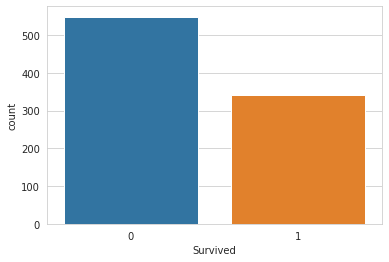

In [ ]:

sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data)

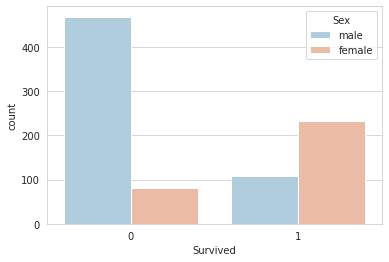

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_data,palette='RdBu_r')

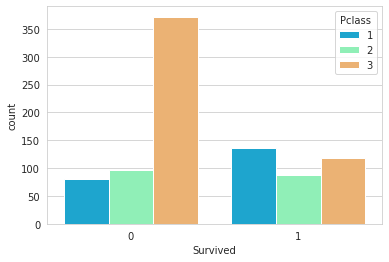

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data,palette='rainbow')

## Observation
1. No.of passenger died are more than the no. of passenger survived.
2. Female passengers survived more than the male passenegrs
3. mostly of the passenger who died are from class 3 and most survived passengers are from class 1

# **Data cleaning** 

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

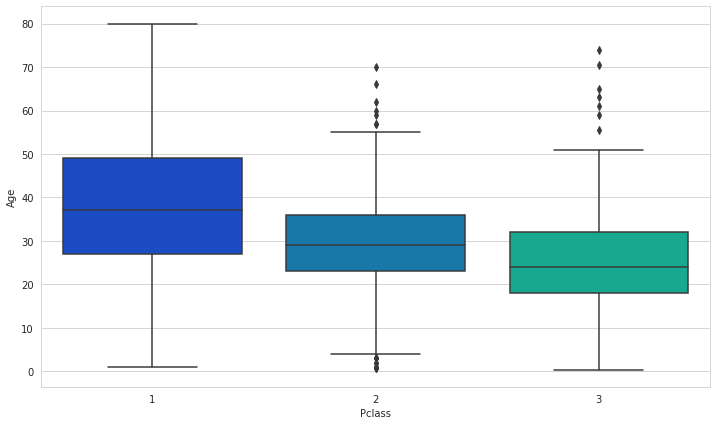

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:

train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

Now let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [ ]:
train_data.drop('Cabin',axis=1,inplace=True)


KeyError: ignored

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_type,Words_Count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,124,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,137,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,148,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,97,4


In [ ]:
train_data.dropna(inplace=True)

As now we have clean the data.
now let convert the categoriical variables accordingly

In [ ]:

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  Ticket_type  889 non-null    int16  
 12  Words_Count  889 non-null    int64  
dtypes: float64(2), int16(1), int64(6), object(4)
memory usage: 92.0+ KB


In [ ]:
pd.get_dummies(train_data['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)

In [ ]:
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_type,Words_Count
0,1,0,3,22.0,1,0,7.2500,124,4
1,2,1,1,38.0,1,0,71.2833,137,7
2,3,1,3,26.0,0,0,7.9250,148,3
3,4,1,1,35.0,1,0,53.1000,3,7
4,5,0,3,35.0,0,0,8.0500,97,4


## Model Building

spliting the data

In [ ]:
train_data.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Ticket_type,Words_Count
0,1,3,22.0,1,0,7.2500,124,4
1,2,1,38.0,1,0,71.2833,137,7
2,3,3,26.0,0,0,7.9250,148,3
3,4,1,35.0,1,0,53.1000,3,7
4,5,3,35.0,0,0,8.0500,97,4


In [ ]:
train_data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Survived',axis=1), 
                                                    train_data['Survived'], test_size=0.30, 
                                                    random_state=101)

**Training and predicting**

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
accuracy=confusion_matrix(y_test,predictions)
accuracy

array([[143,  20],
       [ 55,  49]])

In [ ]:

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7191011235955056

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       163
           1       0.71      0.47      0.57       104

    accuracy                           0.72       267
   macro avg       0.72      0.67      0.68       267
weighted avg       0.72      0.72      0.70       267



**2. SVM Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.776      0.792      0.76612903 0.75806452 0.76612903]
0.7716645161290322


In [ ]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.664      0.664      0.62903226 0.65322581 0.63709677]
0.6494709677419356


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.768      0.776      0.77419355 0.75       0.70967742]
0.7555741935483871


##Evaluation
based on the model accuracy and cross value score: random forest is the best model for this.